### Cell dedicated to imputation techniques

In [1]:
import numpy as np
import pandas as pd
from typing import Tuple, Optional, List

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%run plot.ipynb

In [3]:
class DistributionInfo:
  def __init__(self, vals):
    self.vals = vals
  
  def _mean(self):
    vals_lst = self.vals[~np.isnan(self.vals)]
    
    return sum(self.vals) / len(self.vals)
  
  def _moments(self, moment):
    
    vals_mean = self._mean()
    prod = [
      (val - vals_mean) ** moment 
      for val 
      in self.vals]
      
    return sum(prod) / len(self.vals)
  
  def _skew(self):
    
    len_vals = len(self.vals)
    moment_ratio = self._moments(3) / self._moments(2) ** 1.5

    return (len_vals * (len_vals - 1)) ** 0.5 / ((len_vals - 2)) * (moment_ratio)
  
  def _std_dev(self):
      mean = self._mean()
      citatel = [(val - mean) ** 2 for val in self.vals ]

      return (sum(citatel) / (len(self.vals) - 1)) ** 0.5
    
  def _kurtosis(self):
    
    return self._moments(4) / self._moments(2) ** 2
  
  def get_kurtosis_skewness(self):# -> Tuple[float, float]:
  
    return self._kurtosis(), self._skew()

In [4]:
class ImpError:
  def __init__(self, actual: np.array, imputed: np.array):
    self.actual = actual
    self.imputed = imputed
    
   
  def _calculate_error_point(self, error_lst = []):
    for actual, imputed in list(zip(self.actual, self.imputed)):
      err = np.abs((imputed - actual)/actual)
      error_lst.append(err)

      #print(f"Actual: {actual} \t Imputed: {imputed} \t err: {err} \n")
      #np.savetxt(f"/dbfs/mnt/pbi/Bots/err_{name}.csv", error_lst, delimiter=",")
      
      
      
    return sum(error_lst) / len(self.imputed)
  

In [5]:
from typing import Optional, Tuple
import numpy as np

class ImpPlot:
  def __init__(self, SMALL_SIZE = None, BIG_SIZE = None):
    self.SMALL_SIZE = SMALL_SIZE
    self.BIG_SIZE = BIG_SIZE
  
  @staticmethod
  def _config_text(SMALL_SIZE: Optional[int] = None, BIG_SIZE: Optional[int] = None):  
    plt.rc('font', size=SMALL_SIZE)
    plt.rc('axes', titlesize=SMALL_SIZE)
    plt.rc('axes', labelsize=SMALL_SIZE)
    plt.rc('legend', fontsize=SMALL_SIZE)
    plt.rc('figure', titlesize=BIG_SIZE)
    
  @staticmethod
  def filter_error_iteration(err, iter, iter_to_plot: int):
    
    return [x for x, y in list(zip(err, iter)) if y == iter_to_plot]
  
  @staticmethod
  def save_figure(
                  distribution: Optional[str] = None,
                  tol: Optional[str] = None,
                  name: Optional[str] = None,
                  type_plot: Optional[str] = None
                ):
    pass
  
    #if (method and tol and name) is not None:
    #  plt.savefig(f'/dbfs/mnt/pbi/Bots/T_budget/{type_plot}_{name}_{distribution}_{tol}.png')
    #  plt.savefig(f'/dbfs/mnt/pbi/Bots/T_budget/{type_plot}_{name}_{distribution}_{tol}.png')
    #elif name is not None:
    #  plt.savefig(f'/dbfs/mnt/pbi/Bots/T_budget/hist__{name}.png')

      
  def histplot(
                self, 
                data, 
                bins, 
                x_name: str, 
                title: str, 
                text: Optional[str] = None, 
                figsize: Optional[Tuple[int, int]] = None,
                distribution: Optional[str] = None,
                tol: Optional[str] = None,
                name: Optional[str] = None
          ):
    
    if figsize is not None:
      fig, ax = plt.subplots(figsize = figsize)
    else:
      fig, ax = plt.subplots(figsize = (20, 10))
      
    n, bins, patches = plt.hist(data, 50, density=False, facecolor='b', alpha=0.75)
    
    if (self.SMALL_SIZE is not None) and (self.SMALL_SIZE is not None):
      self._config_text(SMALL_SIZE = self.SMALL_SIZE, BIG_SIZE = self.BIG_SIZE)
    
    #TEXT GRAPH
    plt.xlabel(x_name)
    plt.ylabel('Počet výskytů náhodné veličiny')
    
    plt.title(title)
    
    if text is not None:
      plt.text(text)
      
    plt.grid(True)
    
    self.save_figure(
                  distribution = distribution,
                  tol = tol,
                  name = name
                )
    
    return self.save_figure(
                  distribution = distribution,
                  tol = tol,
                  name = name
                )
    #plt.show()
  
  def err_plot(self,   
                  err: np.array,
                  iter: np.array,
                  y_color: str, 
                  y_label: str,
                  iter_to_plot: int,
                  units: Optional[str],
                  y_lim: Optional[list] = None,
                  distribution: Optional[str] = None,
                  tol: Optional[str] = None,
                  name: Optional[str] = None
              ):
    
    y = self.filter_error_iteration(err, iter, iter_to_plot)
    if units is None:
      units = '[-]'
    #Figure grid setup
    fig, ax = plt.subplots(figsize = (20, 10))
    
    if (self.SMALL_SIZE is not None) and (self.SMALL_SIZE is not None):
      self._config_text(SMALL_SIZE = self.SMALL_SIZE, BIG_SIZE = self.BIG_SIZE)
    
    #grid max-min
    plt.xlim([0, len(y) + 1])
    
    if y_lim is not None:
      plt.ylim(y_lim)
    
    #Plot baselines
    plt.axhline(y = 0, color = 'k', linestyle = '-')
    plt.axhline(y = 0.01, color = 'r', linestyle = ':')
    plt.axhline(y = -0.01, color = 'r', linestyle = ':')
    
    #plot legend
    ax.set_xlabel(f"{iter_to_plot}-tá iterace {units}")
    ax.set_ylabel(f"Velikost relativního rozdílu i-té a předchozí iterace")
    ax.set_title(f'Velikost relativního rozdílu i-té a předchozí iterace pro {iter_to_plot}-tý chybějící bod')
    
    #plotting
    plt.plot(y, y_color, label = y_label)
    plt.legend()
    
    self.save_figure(
                  distribution = distribution,
                  tol = tol,
                  name = name,
                  type_plot = "error"
                )
    
    return plt.show()

  
  def imp_plot( self,
                y: np.array,
                y2: np.array,
                y_color: str, 
                y_label: str,
                y2_color: str, 
                y2_label: str,
                units: Optional[str] = None,
                legend_position: Optional[str] = None,
                distribution: Optional[str] = None,
                tol: Optional[str] = None,
                name: Optional[str] = None,
                type_name: Optional[str] = None
              ):
    
    x = np.arange(1, len(y) + 1)
    if units is None:
      units = '[-]'
    #Figure grid setup
    fig, ax = plt.subplots(figsize = (20, 10))
    
    #grid max-min
    lower_lim = min(np.minimum(y, y2)) - 0.5
    upper_lim = max(np.maximum(y, y2)) + 0.5
    
    plt.xlim([0, len(y) + 1])
    plt.ylim([lower_lim, upper_lim])
    
    #Plot baselines
    plt.axhline(y = 0, color = 'k', linestyle = '')
    
    #Plot legend
    ax.set_xlabel("I-tý nezmáný bod [-]")
    ax.set_ylabel(f"Hodnota bodu {units}")
    ax.set_title('Rozdíl skutečné a odhadnuté hodnoty')
    
    #Plot lines
    plt.plot(x, y, y_color, label = y_label)
    plt.plot(x, y2, y2_color, label = y2_label)
    
    plt.legend()
    
    self.save_figure(
                  distribution = distribution,
                  tol = tol,
                  name = type_name,
                  type_plot = "impute"
                )
    
    
    return plt.show()


C:\Users\On\AppData\Local\Temp\ipykernel_24524\3806541911.py:191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data[col][0:num_vals] = np.nan


distribution 		 --> 		 normal
tol 		 --> 		 0.001
[1506.26048396 1499.3284247  1554.56879433 ... 1645.         1408.
 1500.        ]
0.21379797886819907


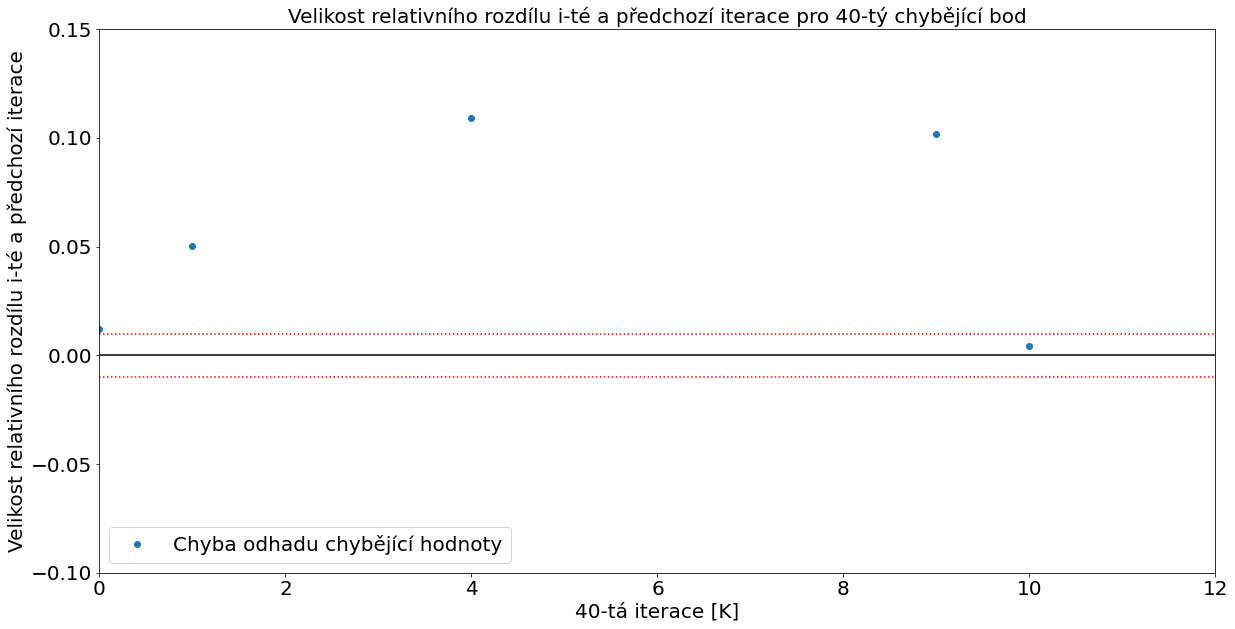

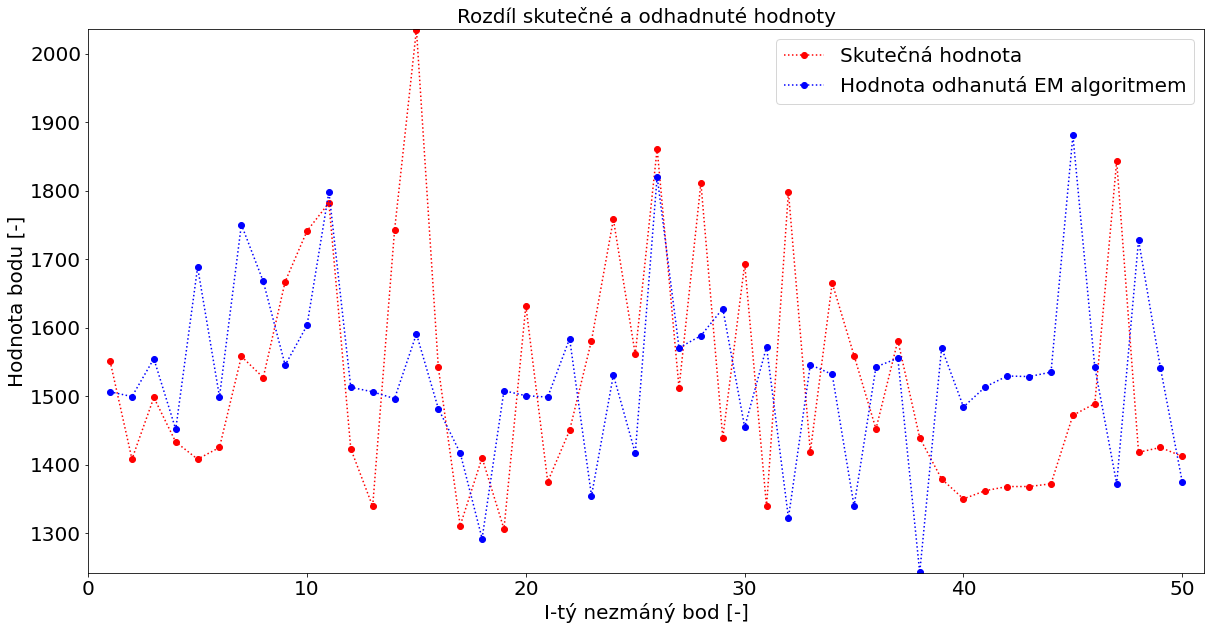

In [8]:
class EM_impute(DistributionInfo):
    from typing import Optional, Tuple
    from scipy.stats import skewnorm
    
    def __init__(self, array, vals = None):
        self.array = array
        super().__init__(vals)

    def _get_from_normal(self):
        array = self.array[~np.isnan(self.array)]

        return np.random.normal(
            array.mean(), 
            array.std()
            )
        
    def _get_from_skewed_normal(self):
      
      kurtosis, skewness = self.get_kurtosis_skewness()
      std = self._std_dev()
      mean = self._mean()
      
      print(f"Sikmost rozdeleni: {skewness} \t a spicatost: {kurtosis} \n")
      
      return skewnorm.rvs(loc = mean, scale = std, size=1)
    
    def _get_from_uniform(
        self,
        min: float,
        max: float
    ):
    
      return np.random.uniform(min, max)
    
    def _impute_skewnorm(
                self,
                nan_array: np.array, 
                nan_index: np.array, 
                tol: Optional[float] = None
                ):
      
        val_lst = []
        index_lst = []
        prev  = 100000
        prvek = 0
        counter = 0

        for _ in nan_array:
            prvek += 1
            val = self._get_from_normal()
            delta = np.abs(val - prev) / prev
            val_lst.append(delta)
            index_lst.append(prvek)
            prev = val
          
            if tol:
                while np.abs(delta) > tol:
                  val = self._get_from_skewed_normal()
                  delta = np.abs(val - prev) / prev
                  prev = val
                  val_lst.append(delta)
                  index_lst.append(prvek)

                self.array[nan_index[prvek - 1]] = val
            else:
                while np.abs(delta) > 0.01:
                  val = self._get_from_skewed_normal()
                  delta =  np.abs(val - prev) / prev
                  prev = val
                  val_lst.append(delta)
                  index_lst.append(prvek)

                self.array[nan_index[prvek - 1]] = val

        return self.array, val_lst, index_lst

    def _impute_normal(
                self,
                nan_array: np.array, 
                nan_index: np.array, 
                tol: Optional[float] = None
                ):
      
        val_lst = []
        index_lst = []
        prev  = 100000
        prvek = 0
        counter = 0

        for _ in nan_array:
            prvek += 1
            val = self._get_from_normal()
            delta = np.abs(val - prev) / prev
            val_lst.append(delta)
            index_lst.append(prvek)
            prev = val
          
            if tol:
                while np.abs(delta) > tol:
                  val = self._get_from_normal()
                  delta = np.abs(val - prev) / prev
                  prev = val
                  val_lst.append(delta)
                  index_lst.append(prvek)

                self.array[nan_index[prvek - 1]] = val
            else:
                while np.abs(delta) > 0.01:
                  val = self._get_from_normal()
                  delta =  np.abs(val - prev) / prev
                  prev = val
                  val_lst.append(delta)
                  index_lst.append(prvek)

                self.array[nan_index[prvek - 1]] = val

        return self.array, val_lst, index_lst
      
    def _impute_uniform(
                self,
                nan_array: np.array, 
                nan_index: np.array, 
                tol: Optional[float] = None
                ):
        
        val_lst = []
        index_lst = []
        prev  = 100000
        prvek = 0

        for _ in nan_array:
            prvek += 1
            val = self._get_from_normal()
            delta = np.abs(val - prev) / prev
            val_lst.append(delta)
            index_lst.append(prvek)
            prev = val
          
            if tol:
                while np.abs(delta) > tol:
                  val = self._get_from_uniform()
                  delta = np.abs(val - prev) / prev
                  prev = val
                  val_lst.append(delta)
                  index_lst.append(prvek)               

                self.array[nan_index[prvek - 1]] = val
            else:
                while np.abs(delta) > 0.01:
                  val = self._get_from_uniform()
                  delta =  np.abs(val - prev) / prev
                  prev = val
                  val_lst.append(delta)
                  index_lst.append(prvek)

                self.array[nan_index[prvek - 1]] = val

        return self.array, val_lst, index_lst

    def em_imputation(self, **params) -> np.array:
      
      for k, v in params.items():
        print(f"{k} \t\t --> \t\t {v}")

      nan_array = self.array[np.isnan(self.array)]
      nan_index = np.argwhere(np.isnan(self.array))[:,0]

      if params["distribution"] == "normal":
          imputed_array, val_lst, index_lst = self._impute_normal(nan_array, nan_index)
      elif params["distribution"] == "dirichlet":
          imputed_array, val_lst, index_lst = self._impute_dirichlet(nan_array, nan_index, params["m"], params["n"], params["size"])
      elif params["distribution"] == "skew_normal":
          imputed_array, val_lst, index_lst = self._impute_normal(nan_array, nan_index)
      else:
        raise ValueError("Zadej vsechny hodnoty prosim.")

      return imputed_array, val_lst, index_lst

class Impute(EM_impute):
    def __init__(self, data, columns: List[str], ITER_TO_PLOT: int) :
        self.data = data
        self.columns = columns
        self.orig_data = self.data.copy()
        self.ITER_TO_PLOT = ITER_TO_PLOT

        super().__init__(None)
    
    def _create_missing_vals(self, col: List[str], num_vals):

        #d = self.data[col][0:self.num_vals].copy().to_numpy()
        self.data[col][0:num_vals] = np.nan

        self.array = self.data[col].to_numpy()

    
    def impute_cols(
                    self, 
                    num_vals,
                    EM_SKUTECNA = "Skutečná hodnota", 
                    EM_ODHADNUTA = "Hodnota odhanutá EM algoritmem", 
                    CHYBA_ODHADU = "Chyba odhadu chybějící hodnoty",
                    distribution: Optional[str] = None
                ):

        pplot = ImpPlot(
                SMALL_SIZE = 20, 
                BIG_SIZE = 16
            )

        

        for col in self.columns:
            self._create_missing_vals(col, num_vals)
            if distribution is not None:
              pred, err, index = self.em_imputation(distribution = distribution, tol = 0.001)
            else:
              pred, err, index = self.em_imputation(distribution = "normal", tol = 0.001)
            print(pred)
            
            error_normal = ImpError(
                                            actual = self.orig_data[col][0:num_vals],
                                            imputed = pred[0:num_vals]
                                    )
            print(error_normal._calculate_error_point())
            #print(pred)

            pplot.err_plot(
                            err, 
                            index, 
                            'o', 
                            CHYBA_ODHADU, 
                            iter_to_plot = self.ITER_TO_PLOT, 
                            y_lim = [-0.1, 0.15], 
                            units = '[K]', 
                            distribution = "normal", 
                            tol = '0.01', 
                            name = 'teplota_vzduchu'
                        )


            pplot.imp_plot(
                        y = self.orig_data[col][0:num_vals],
                        y2 = pred[0:num_vals],
                        y_color = 'o:r',
                        y_label = EM_SKUTECNA,
                        y2_color = 'o:b',
                        y2_label = EM_ODHADNUTA
                        )


imp = Impute(
            data = pd.read_csv("./ai4i2020.csv"), 
            columns = ['Rotational speed [rpm]'], 
            ITER_TO_PLOT = 40
        )

        
imp.impute_cols(distribution = "normal", num_vals = 50)


In [7]:
pd.read_csv('./ai4i2020.csv')

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
